### Gibbs Sampling

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [37]:
def gibbs_sampler(start, num_samples=100, warmup=0):
    """
    Gibbs Sampler
    """
    x = start
    
    num_components = x.shape[0]
    samples = [start]
    for i in range(num_samples+warmup):
        for j in range(num_components):
            x = conditional_sampler(x, j, np.array([1,0]), np.array([[5,1],[1,1]]))
            
        samples.append(x)  
        
    return np.array(samples[warmup+1:])

In [34]:
def conditional_sampler(x, index, mean, cov):

    cond_index = 1 - index 

    a = cov[index, index]
    b = cov[index, cond_index]
    c = cov[cond_index, cond_index]

    mu = mean[index] + (b * (x[cond_index] - mean[cond_index]))/c

    sigma = np.sqrt(a-(b**2)/c)

    new_x = np.copy(x)
    new_x[index] = np.random.randn()*sigma + mu
    
    return new_x

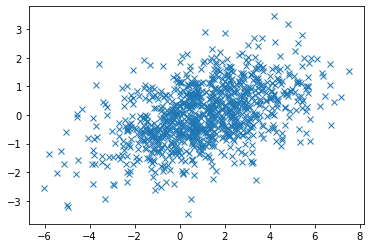

In [40]:
start=np.array([0.1,0])

samples = gibbs_sampler(start,1000,100)

plt.plot(samples[:,0], samples[:,1], 'x')

#plt.gca().set_aspect('equal')